In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from statsmodels.graphics.regressionplots import influence_plot

In [5]:
import statsmodels.api as smf

In [6]:
import numpy as np

In [7]:
compdata = pd.read_csv("50_Startups.csv")

In [8]:
compdata.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
compdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [10]:
compdata.groupby("State").mean()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,64657.674118,120746.507059,182540.929412,103905.175294
Florida,80724.016250,121768.897500,247323.551250,118774.024375
New York,76195.062353,121543.470588,205346.015882,113756.446471


In [11]:
compdata.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


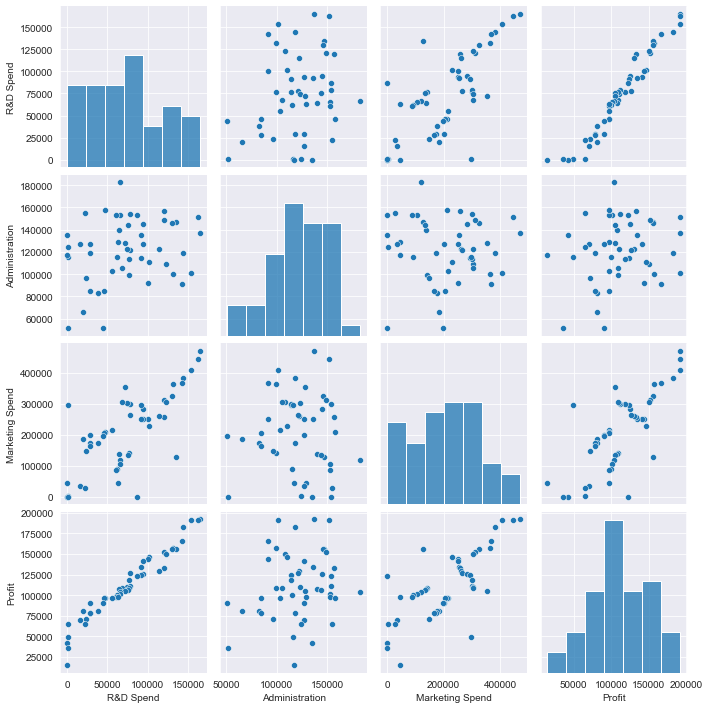

In [12]:
sns.set_style(style='darkgrid')
sns.pairplot(compdata)

In [13]:
compdata = pd.get_dummies(compdata,drop_first= True)

In [14]:
compdata.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [15]:
x = compdata.drop("Profit", axis= 1)
y = compdata["Profit"]

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 4)

In [17]:
m1 = smf.OLS(y_train, x_train).fit()

In [18]:
m1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.984     
Dependent Variable:     Profit           AIC:                         819.9146  
Date:                   2021-07-05 18:25 BIC:                         827.9692  
No. Observations:       37               Log-Likelihood:              -404.96   
Df Model:               5                F-statistic:                 466.5     
Df Residuals:           32               Prob (F-statistic):          6.70e-29  
R-squared (uncentered): 0.986            Scale:                       2.1732e+08
---------------------------------------------------------------------------------
                       Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------------
R&D Spend               0.7120     0.0803  8.8684  0.0000      0.5485      0.8756
Administration          0.3159     0.0411  7.6916  0.0000      0.2323      0.3996
Marketing Spend         0.0750     0.0273  2.7471  0.0098      0.0194      0.1307
State_Florida        4648.3053  6599.1745  0.7044  0.4863  -8793.7733  18090.3839
State_New York       5254.3203  5589.2778  0.9401  0.3542  -6130.6660  16639.3067
--------------------------------------------------------------------------------
Omnibus:                   1.086             Durbin-Watson:               2.162 
Prob(Omnibus):             0.581             Jarque-Bera (JB):            1.075 
Skew:                      -0.288            Prob(JB):                    0.584 
Kurtosis:                  2.395             Condition No.:               863038
================================================================================
* The condition number is large (9e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [19]:
y_train2 = np.sqrt(y_train)

In [20]:
y_train2.head()

15    360.440064
16    356.360674
27    324.049857
37    299.915221
20    344.200567
Name: Profit, dtype: float64

In [21]:
m2 = smf.OLS(y_train2,x_train).fit()

In [22]:
m2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.975   
Dependent Variable:     Profit           AIC:                         402.6975
Date:                   2021-07-05 18:26 BIC:                         410.7521
No. Observations:       37               Log-Likelihood:              -196.35 
Df Model:               5                F-statistic:                 290.2   
Df Residuals:           32               Prob (F-statistic):          1.16e-25
R-squared (uncentered): 0.978            Scale:                       2753.8  
--------------------------------------------------------------------------------
                       Coef.    Std.Err.      t      P>|t|     [0.025     0.975]
--------------------------------------------------------------------------------
R&D Spend              0.0008     0.0003    2.9633   0.0057     0.0003    0.0014
Administration         0.0016     0.0001   10.6512   0.0000     0.0013    0.0019
Marketing Spend        0.0003     0.0001    2.5996   0.0140     0.0001    0.0005
State_Florida         19.3363    23.4913    0.8231   0.4165   -28.5140   67.1866
State_New York        22.1796    19.8964    1.1148   0.2733   -18.3480   62.7072
------------------------------------------------------------------------------
Omnibus:                  0.481            Durbin-Watson:               2.069 
Prob(Omnibus):            0.786            Jarque-Bera (JB):            0.515 
Skew:                     0.246            Prob(JB):                    0.773 
Kurtosis:                 2.696            Condition No.:               863038
==============================================================================
* The condition number is large (9e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [23]:
y_train3 = np.log(y_train)

In [24]:
y_train3.head()

15    11.774651
16    11.751887
27    11.561795
37    11.407000
20    11.682449
Name: Profit, dtype: float64

In [25]:
m3 = smf.OLS(y_train3,x_train).fit()

In [26]:
m3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.965   
Dependent Variable:     Profit           AIC:                         166.1984
Date:                   2021-07-05 18:26 BIC:                         174.2530
No. Observations:       37               Log-Likelihood:              -78.099 
Df Model:               5                F-statistic:                 206.9   
Df Residuals:           32               Prob (F-statistic):          2.23e-23
R-squared (uncentered): 0.970            Scale:                       4.6130  
---------------------------------------------------------------------------------
                     Coef.     Std.Err.       t       P>|t|      [0.025    0.975]
---------------------------------------------------------------------------------
R&D Spend           -0.0000      0.0000    -0.9391    0.3547    -0.0000    0.0000
Administration       0.0001      0.0000    12.6873    0.0000     0.0001    0.0001
Marketing Spend      0.0000      0.0000     2.6415    0.0127     0.0000    0.0000
State_Florida        0.6374      0.9615     0.6629    0.5121    -1.3210    2.5958
State_New York       0.7440      0.8143     0.9137    0.3677    -0.9147    2.4028
------------------------------------------------------------------------------
Omnibus:                  2.281            Durbin-Watson:               2.056 
Prob(Omnibus):            0.320            Jarque-Bera (JB):            1.531 
Skew:                     0.494            Prob(JB):                    0.465 
Kurtosis:                 3.132            Condition No.:               863038
==============================================================================
* The condition number is large (9e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [27]:
x_train1 = x_train.drop(["State_Florida","State_New York"],axis = 1)

In [28]:
x_train1.head()

,R&D Spend,Administration,Marketing Spend
15,114523.61,122616.84,261776.23
16,78013.11,121597.55,264346.06
27,72107.60,127864.55,353183.81
37,44069.95,51283.14,197029.42
20,76253.86,113867.30,298664.47


In [29]:
m4 = smf.OLS(y_train3,x_train1).fit()

In [30]:
m4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.966   
Dependent Variable:     Profit           AIC:                         163.2459
Date:                   2021-07-05 18:27 BIC:                         168.0786
No. Observations:       37               Log-Likelihood:              -78.623 
Df Model:               3                F-statistic:                 355.8   
Df Residuals:           34               Prob (F-statistic):          9.83e-26
R-squared (uncentered): 0.969            Scale:                       4.4663  
---------------------------------------------------------------------------------
                     Coef.     Std.Err.       t       P>|t|      [0.025    0.975]
---------------------------------------------------------------------------------
R&D Spend           -0.0000      0.0000    -0.8516    0.4004    -0.0000    0.0000
Administration       0.0001      0.0000    14.5459    0.0000     0.0001    0.0001
Marketing Spend      0.0000      0.0000     2.7768    0.0089     0.0000    0.0000
------------------------------------------------------------------------------
Omnibus:                   1.760            Durbin-Watson:               2.019
Prob(Omnibus):             0.415            Jarque-Bera (JB):            1.284
Skew:                      0.456            Prob(JB):                    0.526
Kurtosis:                  2.960            Condition No.:               10   
==============================================================================

"""

In [31]:
x_train2 = x_train.drop(["State_Florida","State_New York"],axis = 1)

In [32]:
x_train2.head()

,R&D Spend,Administration,Marketing Spend
15,114523.61,122616.84,261776.23
16,78013.11,121597.55,264346.06
27,72107.60,127864.55,353183.81
37,44069.95,51283.14,197029.42
20,76253.86,113867.30,298664.47


In [33]:
m5 = smf.OLS(y_train,x_train1).fit()

In [34]:
m5.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.985     
Dependent Variable:     Profit           AIC:                         817.0399  
Date:                   2021-07-05 18:27 BIC:                         821.8726  
No. Observations:       37               Log-Likelihood:              -405.52   
Df Model:               3                F-statistic:                 801.0     
Df Residuals:           34               Prob (F-statistic):          1.36e-31  
R-squared (uncentered): 0.986            Scale:                       2.1085e+08
------------------------------------------------------------------------------------
                     Coef.      Std.Err.       t        P>|t|      [0.025     0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7211       0.0782     9.2257     0.0000     0.5622     0.8799
Administration       0.3325       0.0370     8.9958     0.0000     0.2574     0.4076
Marketing Spend      0.0769       0.0266     2.8875     0.0067     0.0228     0.1311
--------------------------------------------------------------------------------
Omnibus:                    0.343             Durbin-Watson:               2.072
Prob(Omnibus):              0.843             Jarque-Bera (JB):            0.516
Skew:                       -0.129            Prob(JB):                    0.772
Kurtosis:                   2.482             Condition No.:               10   
================================================================================

"""

In [35]:
m5.rsquared

0.9860475817674978

In [36]:
data = [{'R Square Values': m1.rsquared, 'AIC':m1.aic}, {'R Square Values': m2.rsquared, 'AIC':m2.aic},{'R Square Values': m3.rsquared, 'AIC':m3.aic}, {'R Square Values': m4.rsquared, 'AIC':m4.aic}, {'R Square Values': m5.rsquared, 'AIC':m5.aic}]

In [37]:
df = pd.DataFrame(data, index =['Model without any modification', 'Y transformed using sqrt','Y transformed using natural log','Y -ln with insignificant variables removed','Insignificant values removed with original model'])
  

In [38]:
df

,R Square Values,AIC
Model without any modification,0.986466,819.914586
Y transformed using sqrt,0.978421,402.697533
Y transformed using natural log,0.969992,166.198373
Y -ln with insignificant variables removed,0.969130,163.245889
Insignificant values removed with original model,0.986048,817.039860
